In [34]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [12]:
data = pd.read_csv("r2vals.csv").sort_values("r2 ")

In [15]:
data.describe()

r2 
count  133.000000
mean     0.677843
std      0.229390
min      0.135144
25%      0.474227
50%      0.734562
75%      0.878335
max      0.968964

In [104]:
data = pd.read_csv("new_repr_no_outlier.csv")
data["SQRSIZE"] = data["SIZE"].apply(np.sqrt)
data["LNSIZE"] = data["SIZE"].apply(np.log)
data["LOG2SIZE"] = data["SIZE"].apply(np.log2)
maps = data["MAP"].unique()
tests = data["TEST"].unique()
groups = data.groupby(["MAP", "TEST"])

In [156]:
size = pd.Series(range(1, 50000000, 100000))
predictors = pd.DataFrame([size, np.sqrt(size), np.log(size), np.log2(size)]).T
predictors.columns = ["SIZE","SQRSIZE","LNSIZE","LOG2SIZE" ]
regression_results = pd.DataFrame([[],[], [], []]).T
rvals = []

for i, group in groups:
    results = smf.ols('TIME~SIZE+SQRSIZE+LNSIZE+LOG2SIZE', data=group).fit()
    pred = results.predict(predictors)
    rvals.append(results.rsquared)
    regression_results = regression_results.append([[i[1], i[0], size[a], pred[a]] for a in range(len(test))])  
regression_results.rename(columns={0: "test", 1: "map", 2:"size", 3: "time"})
regression_results.columns = ["test", "map", "size", "time"]

In [157]:
regroup = regression_results.groupby(["test"])

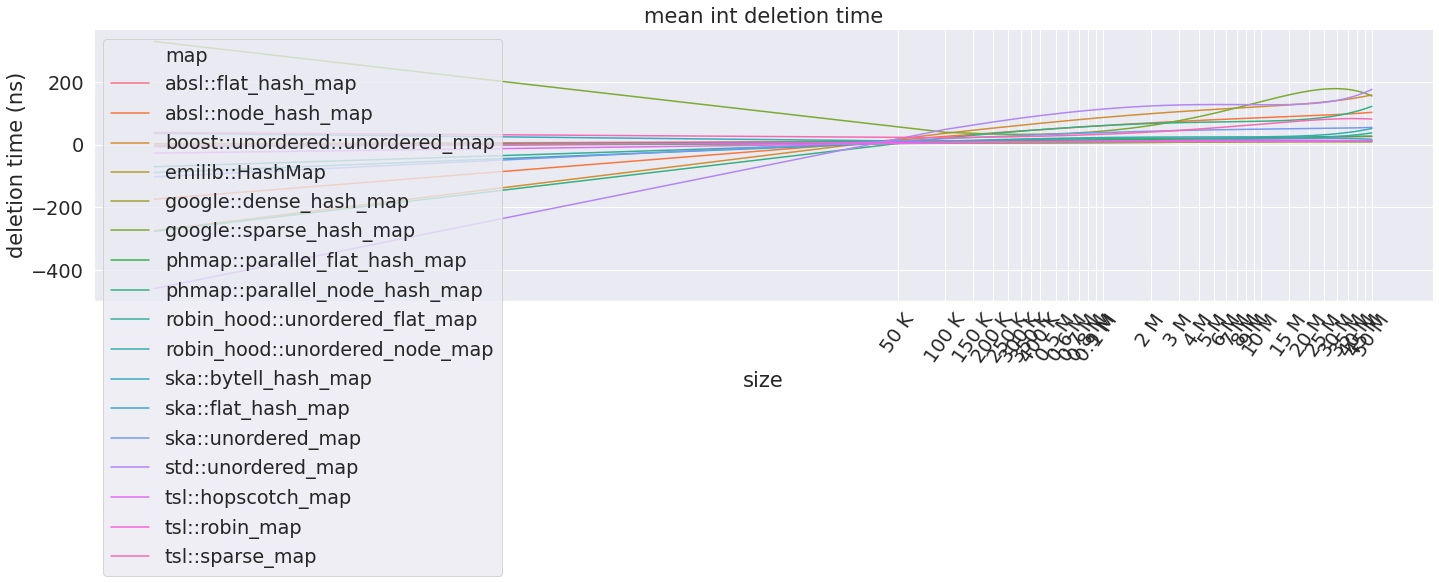

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,5)
sns.set()
sns.set(font_scale=1.75)
ticks = [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 500000,
600000, 700000, 800000, 900000, 1000000,
2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000,
15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000]
ticklabels = ['50 K', '100 K',
 '150 K', '200 K', '250 K', '300 K',
 '350 K', '400 K', '0.5 M', '0.6 M',
 '0.7 M', '0.8 M', '0.9 M', '1 M',
 '2 M', '3 M', '4 M', '5 M',
 '6 M', '7 M', '8 M', '9 M',
 '10 M', '15 M', '20 M', '25 M',
 '30 M', '35 M', '40 M', '45 M', '50 M']
labels = {
    'int_delete' : ["mean int deletion time", "deletion time (ns)"],
    'int_insert' : ["mean int insertion time", "insertion time(ns)"],
    'int_nosucc_lookup' : ["mean int unsucessful lookup time", "unsucessful lookup time (ns)"],
    'int_succ_lookup' : ["mean int succesful lookup time", "succesful lookup time (ns)"],
    'string_delete' : ["mean string deletion time", "deletion time (ns)"],
    'string_insert' : ["mean string insertion time", "insertion time(ns)"], 
    'string_nosucc_lookup' : ["mean string unsucessful lookup time", "unsucessful lookup time (ns)"],
    'string_succ_lookup' : ["mean string succesful lookup time", "succesful lookup time (ns)"]
}

for i, group in regroup:
    plot = sns.lineplot(x="size", y="time", hue="map", data=group)
    plt.xscale("log")
    plt.xticks(ticks, ticklabels)
    plot.set_xticklabels(
        plot.get_xticklabels(), 
        rotation=55, 
        horizontalalignment='center',
        fontweight='light',
        )
    plt.ylabel(labels[i][1])
    plt.legend()
    plt.title(labels[i][0])
    plt.show()
    break

In [155]:
regression_results

test                  map        size        time
0            int_delete  absl::flat_hash_map         1.0    2.516393
1            int_delete  absl::flat_hash_map    100001.0   11.352983
2            int_delete  absl::flat_hash_map    200001.0   12.227014
3            int_delete  absl::flat_hash_map    300001.0   12.806459
4            int_delete  absl::flat_hash_map    400001.0   13.254607
..                  ...                  ...         ...         ...
495  string_succ_lookup      tsl::sparse_map  49500001.0  267.156427
496  string_succ_lookup      tsl::sparse_map  49600001.0  267.172009
497  string_succ_lookup      tsl::sparse_map  49700001.0  267.187371
498  string_succ_lookup      tsl::sparse_map  49800001.0  267.202512
499  string_succ_lookup      tsl::sparse_map  49900001.0  267.217433

[68000 rows x 4 columns]